In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pylab as plt

In [151]:
data = pd.read_csv("invoice_history.csv")
data

,INVOICE_ID,PARTY_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE
0,214341229,233824028,HUF,838701.0,1065150.0,1065150.0,01-05-2017,01-05-2017,08-05-2017
1,214464014,233824108,HUF,175000.0,222250.0,222250.0,05-05-2017,31-05-2017,05-06-2017
2,215035971,233824067,EUR,510.0,647.7,647.7,07-05-2017,07-05-2017,15-05-2017
3,215035983,233824067,EUR,130.0,165.1,165.1,07-05-2017,07-05-2017,15-05-2017
4,215035988,233824067,HUF,40581.0,51538.0,51538.0,07-05-2017,07-05-2017,15-05-2017
...,...,...,...,...,...,...,...,...,...
636909,685206566,250603794,HUF,919926.0,1168306.0,1168306.0,20-10-2020,20-10-2020,04-11-2020
636910,685206567,594633811,HUF,-36800.0,-46736.0,-46736.0,20-10-2020,19-10-2020,03-11-2020
636911,685206568,591638361,HUF,1740000.0,2209800.0,2209800.0,20-10-2020,26-10-2020,26-10-2020
636912,685206569,618230015,HUF,16860.0,16860.0,16860.0,20-10-2020,20-10-2020,20-10-2020


In [152]:
data.head(20)

,INVOICE_ID,PARTY_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE
0,214341229,233824028,HUF,838701.0,1065150.0,1065150.0,01-05-2017,01-05-2017,08-05-2017
1,214464014,233824108,HUF,175000.0,222250.0,222250.0,05-05-2017,31-05-2017,05-06-2017
2,215035971,233824067,EUR,510.0,647.7,647.7,07-05-2017,07-05-2017,15-05-2017
3,215035983,233824067,EUR,130.0,165.1,165.1,07-05-2017,07-05-2017,15-05-2017
4,215035988,233824067,HUF,40581.0,51538.0,51538.0,07-05-2017,07-05-2017,15-05-2017
5,215035998,233824067,EUR,1040.0,1320.8,1320.8,07-05-2017,07-05-2017,15-05-2017
6,215035999,233824067,HUF,31000.0,39370.0,39370.0,07-05-2017,07-05-2017,15-05-2017
7,215036000,233824067,HUF,120900.0,153543.0,153543.0,07-05-2017,07-05-2017,15-05-2017
8,215036001,233824067,HUF,40300.0,51181.0,51181.0,07-05-2017,07-05-2017,15-05-2017
9,216022915,233824235,HUF,1850.0,2350.0,2350.0,08-05-2017,08-05-2017,16-05-2017


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636914 entries, 0 to 636913
Data columns (total 9 columns):
INVOICE_ID            636914 non-null int64
PARTY_ID              636914 non-null int64
CURRENCY              636914 non-null object
TAXEXCLUSIVEAMOUNT    636914 non-null float64
TAXINCLUSIVEAMOUNT    636914 non-null float64
PAYABLEAMOUNT         636914 non-null float64
ISSUEDATE             636914 non-null object
TAXPOINTDATE          636914 non-null object
DUEDATE               636914 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 43.7+ MB


In [154]:
data.isnull().sum()

INVOICE_ID            0
PARTY_ID              0
CURRENCY              0
TAXEXCLUSIVEAMOUNT    0
TAXINCLUSIVEAMOUNT    0
PAYABLEAMOUNT         0
ISSUEDATE             0
TAXPOINTDATE          0
DUEDATE               0
dtype: int64

In [155]:
data['Issue_Year'] = pd.DatetimeIndex(data['ISSUEDATE']).year
data

,INVOICE_ID,PARTY_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE,Issue_Year
0,214341229,233824028,HUF,838701.0,1065150.0,1065150.0,01-05-2017,01-05-2017,08-05-2017,2017
1,214464014,233824108,HUF,175000.0,222250.0,222250.0,05-05-2017,31-05-2017,05-06-2017,2017
2,215035971,233824067,EUR,510.0,647.7,647.7,07-05-2017,07-05-2017,15-05-2017,2017
3,215035983,233824067,EUR,130.0,165.1,165.1,07-05-2017,07-05-2017,15-05-2017,2017
4,215035988,233824067,HUF,40581.0,51538.0,51538.0,07-05-2017,07-05-2017,15-05-2017,2017
...,...,...,...,...,...,...,...,...,...,...
636909,685206566,250603794,HUF,919926.0,1168306.0,1168306.0,20-10-2020,20-10-2020,04-11-2020,2020
636910,685206567,594633811,HUF,-36800.0,-46736.0,-46736.0,20-10-2020,19-10-2020,03-11-2020,2020
636911,685206568,591638361,HUF,1740000.0,2209800.0,2209800.0,20-10-2020,26-10-2020,26-10-2020,2020
636912,685206569,618230015,HUF,16860.0,16860.0,16860.0,20-10-2020,20-10-2020,20-10-2020,2020


In [156]:
yi = data.groupby(['PARTY_ID','Issue_Year']).PARTY_ID.count()

In [157]:
yi

PARTY_ID   Issue_Year
233823838  2017           29
233823840  2017           24
           2018           72
           2019          133
           2020          301
                        ... 
685196737  2020            1
685208615  2020            2
685219699  2020            1
685219700  2020            5
685219703  2020            3
Name: PARTY_ID, Length: 9625, dtype: int64

In [158]:
#counting the number of logins of each member
data['Total_Invoice'] = data.groupby(['PARTY_ID'])['Issue_Year'].transform('count')

In [159]:
newData = data
newData

,INVOICE_ID,PARTY_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE,Issue_Year,Total_Invoice
0,214341229,233824028,HUF,838701.0,1065150.0,1065150.0,01-05-2017,01-05-2017,08-05-2017,2017,90
1,214464014,233824108,HUF,175000.0,222250.0,222250.0,05-05-2017,31-05-2017,05-06-2017,2017,1382
2,215035971,233824067,EUR,510.0,647.7,647.7,07-05-2017,07-05-2017,15-05-2017,2017,156
3,215035983,233824067,EUR,130.0,165.1,165.1,07-05-2017,07-05-2017,15-05-2017,2017,156
4,215035988,233824067,HUF,40581.0,51538.0,51538.0,07-05-2017,07-05-2017,15-05-2017,2017,156
...,...,...,...,...,...,...,...,...,...,...,...
636909,685206566,250603794,HUF,919926.0,1168306.0,1168306.0,20-10-2020,20-10-2020,04-11-2020,2020,90
636910,685206567,594633811,HUF,-36800.0,-46736.0,-46736.0,20-10-2020,19-10-2020,03-11-2020,2020,196
636911,685206568,591638361,HUF,1740000.0,2209800.0,2209800.0,20-10-2020,26-10-2020,26-10-2020,2020,35
636912,685206569,618230015,HUF,16860.0,16860.0,16860.0,20-10-2020,20-10-2020,20-10-2020,2020,79


In [160]:
# data.to_csv(r'dasadkdas.csv')

In [161]:
ctr = data['PARTY_ID'].value_counts()
ctr

233823853    36553
239555419    12938
398958555     7056
334245713     5799
240924264     5268
             ...  
390447787        1
250610567        1
673996689        1
239734049        1
530068580        1
Name: PARTY_ID, Length: 4974, dtype: int64

In [162]:
dfnew=newData.drop_duplicates(subset=['PARTY_ID'])
dfnew.head(10)

,INVOICE_ID,PARTY_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE,Issue_Year,Total_Invoice
0,214341229,233824028,HUF,838701.0,1065150.0,1065150.0,01-05-2017,01-05-2017,08-05-2017,2017,90
1,214464014,233824108,HUF,175000.0,222250.0,222250.0,05-05-2017,31-05-2017,05-06-2017,2017,1382
2,215035971,233824067,EUR,510.0,647.7,647.7,07-05-2017,07-05-2017,15-05-2017,2017,156
9,216022915,233824235,HUF,1850.0,2350.0,2350.0,08-05-2017,08-05-2017,16-05-2017,2017,13
11,492975016,398958555,HUF,-63781.0,-63781.0,-63781.0,03-07-2019,16-06-2019,26-06-2019,2019,7056
13,492975018,420047158,HUF,1150000.0,1460500.0,1460500.0,03-07-2019,25-06-2019,02-08-2019,2019,68
15,492975020,440280065,HUF,-8916480.0,-11323930.0,-11323930.0,03-07-2019,01-07-2019,01-07-2019,2019,1168
16,492975250,233823853,HUF,1790.0,2273.0,2273.0,03-07-2019,03-07-2019,18-07-2019,2019,36553
19,492975253,233823923,HUF,120.0,152.0,152.0,03-07-2019,03-07-2019,11-07-2019,2019,51
22,492975256,257500486,HUF,318898.0,405000.0,405000.0,03-07-2019,03-07-2019,11-07-2019,2019,660


In [163]:
# dfnew.to_csv(r'dasadkdas.csv')

In [164]:
mean = np.mean(dfnew['Total_Invoice']) 
std = np.std(dfnew['Total_Invoice']) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is 128.048652995577
std. deviation is 625.8511258519837


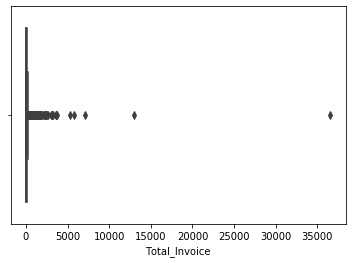

In [165]:
sns.boxplot(x=dfnew['Total_Invoice'])

In [166]:
z = np.abs(stats.zscore(dfnew['Total_Invoice']))
print(z)

[0.06079505 2.00359366 0.04466134 ... 0.2030014  0.2030014  0.2030014 ]


In [167]:
for x in range(len(z)): 
    print (z[x])

0.06079505400550452
2.0035936586315146
0.04466133533973021
0.1838275082416117
11.069647494159724
0.09594718378724944
1.6616593052999962
58.20066441107471
0.12311019316405232
0.8499646721578864
0.03842551687166685
0.8947037464255617
0.13429496173097116
0.049610285438585686
9.0611826243573
0.14388190621690158
0.2971175401358982
0.10074065603021465
0.014458155656840777
0.7381169864886981
0.32268272543171267
0.039867863096764995
0.27954147524502576
0.06703087247356788
0.42973693885793585
5.76487154527822
0.09914283194922624
0.13589278581195957
20.468048738533522
0.01590050188193892
0.469682540882646
0.29232406789293297
0.14228408213591318
1.235040275676092
0.1629003173328722
0.12630584132602912
0.09914283194922624
0.14388190621690158
0.14068625805492477
2.4765495866040825
0.13908843397393636
1.7095940277296484
0.9761927745559704
2.754570976696065
0.09594718378724944
2.1649738908113436
1.6265071755182512
2.6027776890021666
0.041621165033643666
0.0031179092340316785
1.1966924977323703
0.0176

0.07517547073440017
1.4235835172327238
0.1199145450020755
1.1056165251160313
0.15187102662184362
0.1758383878366697
0.0015200851530432732
0.14068625805492477
0.07517547073440017
0.02548744636786935
0.14372642836101132
0.07501999287850991
0.5703454579849155
0.09754500786823785
0.03507439085379978
0.3546392070514808
0.011107029638973703
0.2523784658682229
0.16784926743172765
0.5863236987947996
0.16944709151271606
0.536791152284159
0.07038199849143495
0.07357764665341177
0.13429496173097116
0.1790340359986465
0.19341445272754215
0.19181662864655374
0.5511715690130546
0.1199145450020755
0.17408508589979102
0.15187102662184362
0.19181662864655374
0.04466133533973021
0.1199145450020755
0.086360239301319
0.027240748304748017
0.008066859332887156
0.13589278581195957
0.8691385611297473
0.10393630419219146
0.153468850702832
0.20300139721347257
0.049610285438585686
0.1021830022553128
0.024045100142771208
0.15171554876595333
0.027240748304748017
0.043063511258741805
0.25078064178723447
0.038425516

0.043063511258741805
0.13908843397393636
0.42973693885793585
0.19661010088951894
0.15666449886480882
0.12630584132602912
0.051208109519574094
0.13589278581195957
0.041621165033643666
0.19181662864655374
0.13589278581195957
0.15986014702678564
0.19980574905149576
0.19980574905149576
0.12630584132602912
0.06079505400550452
0.20140357313248416
0.1854253323226001
0.1550666747838204
0.15187102662184362
0.028838572385736422
0.10713195235416827
0.19181662864655374
0.18526985446670985
0.4249434666149707
0.06239287808649293
1.6073332865463903
0.12790366540701753
0.4393238833438663
0.14068625805492477
0.1838275082416117
0.15986014702678564
0.16465361926975086
0.48406295761154167
0.14547973029789
0.13749060989294798
0.22361763241043156
0.11192542459713349
0.16465361926975086
0.10713195235416827
0.1053786504172896
0.3913891609142141
0.0015200851530432732
0.1838275082416117
0.014458155656840777
0.19006332670967507
0.16465361926975086
0.20300139721347257
0.03187874269182297
0.10872977643515667
0.156

0.12950148948800594
0.06558852624846974
0.24758499362525765
0.030436396466724826
0.18862098048457693
0.12950148948800594
0.017653803818817586
0.15826232294579723
0.15826232294579723
0.17264273967469287
0.12295471530816206
0.1774362119176581
0.45849777231572714
0.20140357313248416
0.27794365116403735
0.153468850702832
0.19166115079066348
0.09115371154428421
0.05600158176253931
0.12950148948800594
0.11831672092108711
0.20300139721347257
0.14068625805492477
0.1758383878366697
0.09914283194922624
0.1470775543788784
0.12790366540701753
0.13589278581195957
0.13589278581195957
0.0847624152203306
0.18702315640358852
0.1167188968400987
0.12630584132602912
0.19021880456556534
0.0766178169594983
0.15666449886480882
0.10553412827317986
0.1774362119176581
0.15666449886480882
0.1854253323226001
0.05265045574467223
0.19021880456556534
0.030280918610834564
0.19021880456556534
0.13908843397393636
0.0016755630089335368
0.42334564253398227
0.16305579518876245
0.18862098048457693
0.15986014702678564
0.182

0.20140357313248416
0.0831645911393422
0.20140357313248416
0.19341445272754215
0.21882416016746636
0.1199145450020755
0.20300139721347257
0.13109931356899435
0.011262507494863967
0.18063186007963491
0.16305579518876245
0.17424056375568128
0.1167188968400987
0.17104491559370447
0.12151236908306391
0.1774362119176581
0.19341445272754215
0.1854253323226001
0.20140357313248416
0.1774362119176581
0.12950148948800594
0.19980574905149576
0.20140357313248416
0.18862098048457693
0.14068625805492477
0.19980574905149576
0.18702315640358852
0.15986014702678564
0.20140357313248416
0.19341445272754215
0.19980574905149576
0.1854253323226001
0.19021880456556534
0.051208109519574094
0.2571719381111881
0.19501227680853056
0.20300139721347257
0.20300139721347257
0.20300139721347257
0.1774362119176581
0.20140357313248416
0.19181662864655374
0.13589278581195957
0.07038199849143495
0.13908843397393636
0.16305579518876245
0.01590050188193892
0.20140357313248416
0.14388190621690158
0.15187102662184362
0.26036

0.1758383878366697
0.13589278581195957
0.19501227680853056
0.12790366540701753
0.09754500786823785
0.20300139721347257
0.1838275082416117
0.19980574905149576
0.19661010088951894
0.19820792497050735
0.19341445272754215
0.19980574905149576
0.19501227680853056
0.19181662864655374
0.12630584132602912
0.16465361926975086
0.16784926743172765
0.20140357313248416
0.19341445272754215
0.20140357313248416
0.19181662864655374
0.18063186007963491
0.1758383878366697
0.18702315640358852
0.18063186007963491
0.1199145450020755
0.1151210727591103
0.16625144335073927
0.17104491559370447
0.19980574905149576
0.0831645911393422
0.20300139721347257
0.20140357313248416
0.12950148948800594
0.052805933600562495
0.19181662864655374
0.19661010088951894
0.15187102662184362
0.20140357313248416
0.1822296841606233
0.19980574905149576
0.028838572385736422
0.03842551687166685
0.16465361926975086
0.07677329481538857
0.09275153562527262
0.12790366540701753
0.16625144335073927
0.16784926743172765
0.20300139721347257
0.201

0.19021880456556534
0.1774362119176581
0.19980574905149576
0.16784926743172765
0.19980574905149576
0.18862098048457693
0.20140357313248416
0.19501227680853056
0.15826232294579723
0.1486753784598668
0.19501227680853056
0.18702315640358852
0.19820792497050735
0.20300139721347257
0.1838275082416117
0.19820792497050735
0.15027320254085522
0.19341445272754215
0.19501227680853056
0.20300139721347257
0.19181662864655374
0.20140357313248416
0.19021880456556534
0.1774362119176581
0.19661010088951894
0.12470801724504073
0.19341445272754215
0.153468850702832
0.1854253323226001
0.16625144335073927
0.20300139721347257
0.19820792497050735
0.16625144335073927
0.153468850702832
0.19181662864655374
0.1758383878366697
0.20140357313248416
0.19501227680853056
0.19341445272754215
0.18862098048457693
0.20300139721347257
0.1854253323226001
0.18862098048457693
0.16465361926975086
0.20140357313248416
0.19341445272754215
0.1854253323226001
0.19341445272754215
0.20300139721347257
0.19341445272754215
0.1998057490

0.19021880456556534
0.19661010088951894
0.20300139721347257
0.20300139721347257
0.20300139721347257
0.20140357313248416
0.20140357313248416
0.19021880456556534
0.18702315640358852
0.19181662864655374
0.20300139721347257
0.14068625805492477
0.20300139721347257
0.19661010088951894
0.19661010088951894
0.20140357313248416
0.19501227680853056
0.19501227680853056
0.20300139721347257
0.18862098048457693
0.19820792497050735
0.19501227680853056
0.20140357313248416
0.19820792497050735
0.19820792497050735
0.20140357313248416
0.19021880456556534
0.17264273967469287
0.19980574905149576
0.20300139721347257
0.19820792497050735
0.20300139721347257
0.19181662864655374
0.20140357313248416
0.19181662864655374
0.19661010088951894
0.19021880456556534
0.20300139721347257
0.16784926743172765
0.19181662864655374
0.19661010088951894
0.20300139721347257
0.18862098048457693
0.19820792497050735
0.20300139721347257
0.20140357313248416
0.20300139721347257
0.19661010088951894
0.19661010088951894
0.20300139721347257


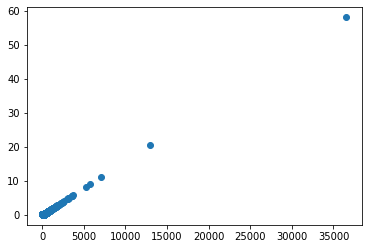

In [168]:
plt.scatter(dfnew['Total_Invoice'], y=z)

In [169]:
threshold = 1
outlier = [] 
for i in dfnew['Total_Invoice']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [1382, 7056, 1168, 36553, 5799, 3736, 12938, 901, 1678, 1198, 1852, 1483, 1146, 1757, 877, 2134, 985, 1980, 951, 1053, 3652, 856, 763, 1632, 1063, 817, 1528, 2264, 1128, 3177, 3650, 1671, 1642, 1336, 774, 5268, 3259, 1107, 980, 3013, 872, 879, 834, 1695, 1271, 1377, 2309, 1072, 908, 820, 1601, 893, 782, 818, 1616, 891, 1244, 2210, 1908, 848, 932, 3655, 1255, 791, 1093, 1794, 1022, 1172, 1801, 2553, 1147, 2342, 2459, 1229, 3088, 1742, 820, 1798, 808, 938, 960, 873, 1370, 1326, 821, 1236, 781, 1010, 1045, 837, 1182, 1097, 1083, 1046, 1511, 778, 767, 1106, 871, 812, 1209, 1368, 939, 882, 1244, 1356, 1216, 1134, 1167, 2609, 774, 1019, 820, 763, 775, 1303, 851, 2562, 1468, 1952, 943, 876, 762, 847, 1134, 1367, 924, 874, 967, 866, 1393, 1857, 1184, 799, 1707, 944, 1449]


In [170]:
# for x in range(len(outlier)): 
#     print (outlier[x])

In [171]:
# ctr.to_csv('New_InvoiceHistory.csv')

In [172]:
# data1 = pd.read_csv("New_InvoiceHistory.csv")
# data1

In [173]:
zs = np.abs(stats.zscore(dfnew['Total_Invoice']))
print(zs)

[0.06079505 2.00359366 0.04466134 ... 0.2030014  0.2030014  0.2030014 ]


In [174]:
dfnew= dfnew[(zs < 1)]

In [175]:
dfnew

,INVOICE_ID,PARTY_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE,Issue_Year,Total_Invoice
0,214341229,233824028,HUF,838701.0,1065150.0,1065150.0,01-05-2017,01-05-2017,08-05-2017,2017,90
2,215035971,233824067,EUR,510.0,647.7,647.7,07-05-2017,07-05-2017,15-05-2017,2017,156
9,216022915,233824235,HUF,1850.0,2350.0,2350.0,08-05-2017,08-05-2017,16-05-2017,2017,13
13,492975018,420047158,HUF,1150000.0,1460500.0,1460500.0,03-07-2019,25-06-2019,02-08-2019,2019,68
19,492975253,233823923,HUF,120.0,152.0,152.0,03-07-2019,03-07-2019,11-07-2019,2019,51
...,...,...,...,...,...,...,...,...,...,...,...
629896,671856741,641558836,HUF,297624.0,297624.0,297624.0,30-09-2020,30-09-2020,30-10-2020,2020,1
629936,671858645,631247080,HUF,240000.0,240000.0,240000.0,30-09-2020,30-09-2020,30-09-2020,2020,1
631346,674018453,645366498,HUF,360000.0,457200.0,457200.0,05-10-2020,05-10-2020,07-10-2020,2020,1
631585,682703613,666202718,HUF,46800.0,59436.0,59436.0,12-10-2020,12-10-2020,27-10-2020,2020,1


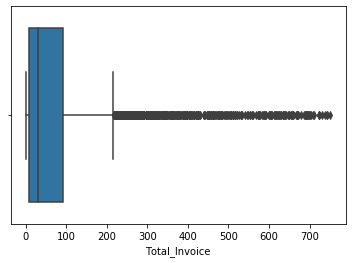

In [176]:
sns.boxplot(x=dfnew['Total_Invoice'])

In [177]:
mean = np.mean(dfnew['Total_Invoice']) 
std = np.std(dfnew['Total_Invoice']) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is 80.33988009096548
std. deviation is 124.60615584410887


In [178]:
def find_cus(df):
    if df['Total_Invoice'] < 80:
        return 1
    else:
        return 0

In [179]:
dfnew['churn'] = dfnew.apply(find_cus,axis=1)

In [180]:
dfnew

,INVOICE_ID,PARTY_ID,CURRENCY,TAXEXCLUSIVEAMOUNT,TAXINCLUSIVEAMOUNT,PAYABLEAMOUNT,ISSUEDATE,TAXPOINTDATE,DUEDATE,Issue_Year,Total_Invoice,churn
0,214341229,233824028,HUF,838701.0,1065150.0,1065150.0,01-05-2017,01-05-2017,08-05-2017,2017,90,0
2,215035971,233824067,EUR,510.0,647.7,647.7,07-05-2017,07-05-2017,15-05-2017,2017,156,0
9,216022915,233824235,HUF,1850.0,2350.0,2350.0,08-05-2017,08-05-2017,16-05-2017,2017,13,1
13,492975018,420047158,HUF,1150000.0,1460500.0,1460500.0,03-07-2019,25-06-2019,02-08-2019,2019,68,1
19,492975253,233823923,HUF,120.0,152.0,152.0,03-07-2019,03-07-2019,11-07-2019,2019,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...
629896,671856741,641558836,HUF,297624.0,297624.0,297624.0,30-09-2020,30-09-2020,30-10-2020,2020,1,1
629936,671858645,631247080,HUF,240000.0,240000.0,240000.0,30-09-2020,30-09-2020,30-09-2020,2020,1,1
631346,674018453,645366498,HUF,360000.0,457200.0,457200.0,05-10-2020,05-10-2020,07-10-2020,2020,1,1
631585,682703613,666202718,HUF,46800.0,59436.0,59436.0,12-10-2020,12-10-2020,27-10-2020,2020,1,1


In [181]:
# dfnew.to_csv("Out_InvoiceHistory.csv")

1356 No churn!
3481 Churn


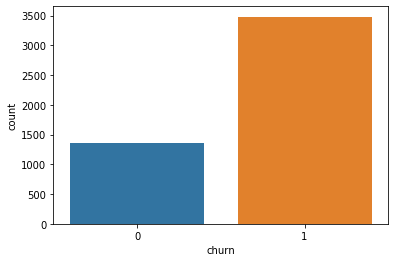

In [182]:
a=len(dfnew[dfnew.churn==0])
b=len(dfnew[dfnew.churn==1])
print(a,"No churn!")
print(b,"Churn")
sns.countplot(dfnew['churn'])#this function counts the values in a column and plots each differently according to the numbers

In [184]:
dfnew.drop(['churn'], axis=1, inplace=True)

In [185]:
dfnew.to_csv("Out_InvoiceHistory.csv")